### Условие 1: Задача 1

Постройте график

Назовите график

Сделайте именование оси x и оси y

Сделайте выводы

### 1.1. Скачать следующие данные: kc-house-data и laptop_price
### 1.2. Изучите стоимости недвижимости

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
df = pd.read_csv('kc_house_data (1).csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


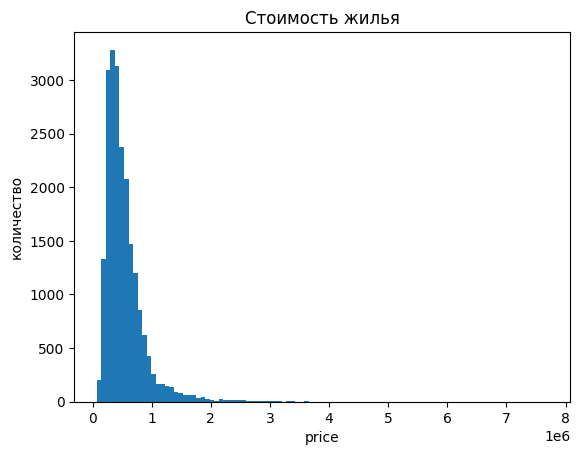

In [65]:
plt.hist(df['price'], bins=100)

plt.title('Стоимость жилья')
plt.xlabel('price')
plt.ylabel('количество');

Основное распределение цены в диапазоне примерно от 300 до 700 тыс. долларов

### 1.3. Изучите распределение квадратуры жилой

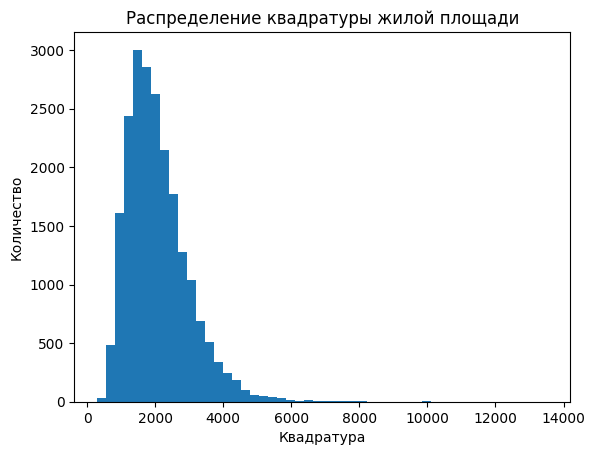

In [66]:
plt.hist(df['sqft_living'], bins=50)
plt.title('Распределение квадратуры жилой площади')
plt.xlabel('Квадратура')
plt.ylabel('Количество');

Больше всего домов с квадратурой от 1000 до 3000 м.кв.

### 1.4. Изучите распределение года постройки

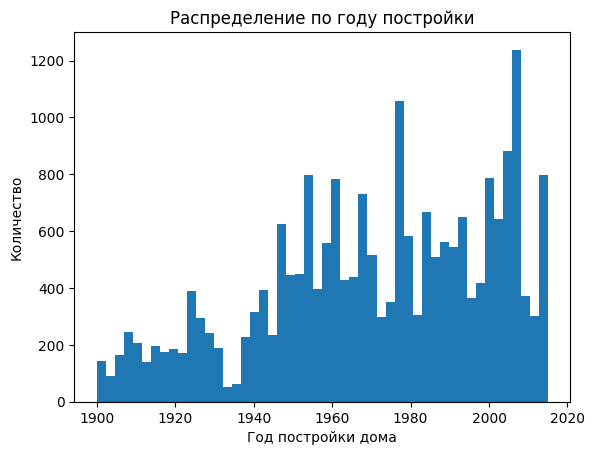

In [67]:
plt.hist(df['yr_built'], bins=50)
plt.title('Распределение по году постройки')
plt.xlabel('Год постройки дома')
plt.ylabel('Количество');

Четкого распределения нет, есть годы, в которых строилось много домов, есть годы просадки по строительству. Можно выделить 2 пика строительства: примерно в 1978 и 2006 годах.

### 2.1. Изучите распределение домов от наличия вида на набережную

Постройте график

Сделайте выводы

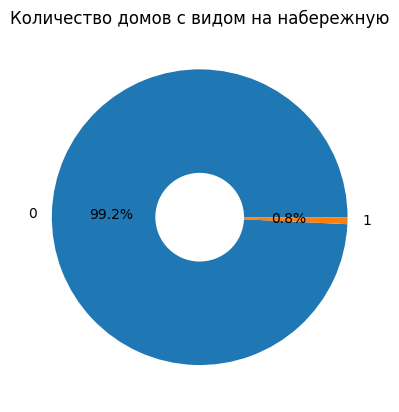

In [68]:
data = df['waterfront'].value_counts()

plt.pie(data.values, labels=data.index, autopct='%.1f%%', wedgeprops=dict(width=0.7));
plt.title('Количество домов с видом на набережную');

Лишь 0,8% домов имеют вид на набережную

### 2.2. Изучите распределение этажей домов

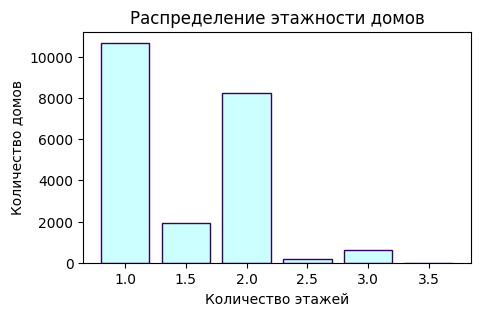

In [69]:
data = df['floors'].value_counts()
data

plt.figure(figsize=(5, 3))
plt.bar(data.index, data.values, color='#CCFFFF', edgecolor='#330066', width=0.4)
plt.title('Распределение этажности домов')
plt.xlabel('Количество этажей')
plt.ylabel('Количество домов');

Больше всего домов одноэтажных, на втором месте по количеству - двухэтажные дома

### 2.3. Изучите распределение состояния домов

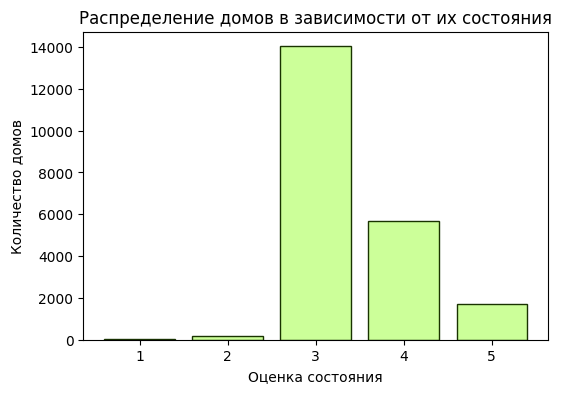

In [70]:
data = df['condition'].value_counts()
data
plt.figure(figsize=(6, 4))
plt.bar(data.index, data.values, color='#CCFF99', edgecolor='#193300', width=0.8)
plt.title('Распределение домов в зависимости от их состояния')
plt.xlabel('Оценка состояния')
plt.ylabel('Количество домов');

Наибольшее количество домов с оценкой 3, в среднем состоянии

### Условие 3: 3 задача

Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.

Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

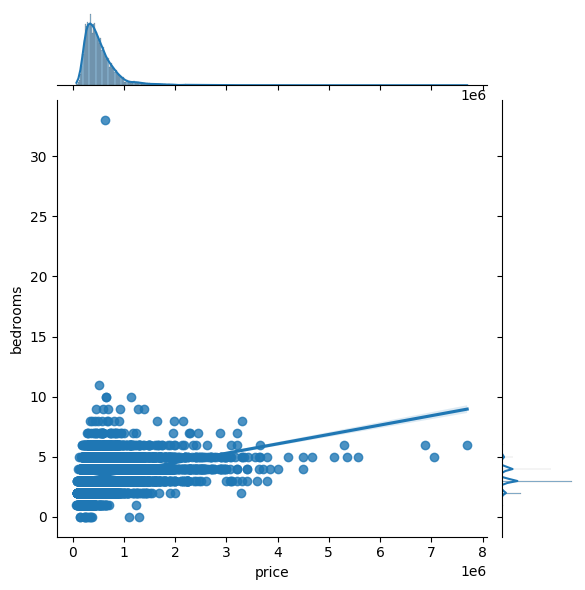

In [71]:
sns.jointplot(x=df['price'], y=df['bedrooms'], kind='reg');

При изучении зависимости стоимости жилья от количества спален видим небольшую прямую корреляцию

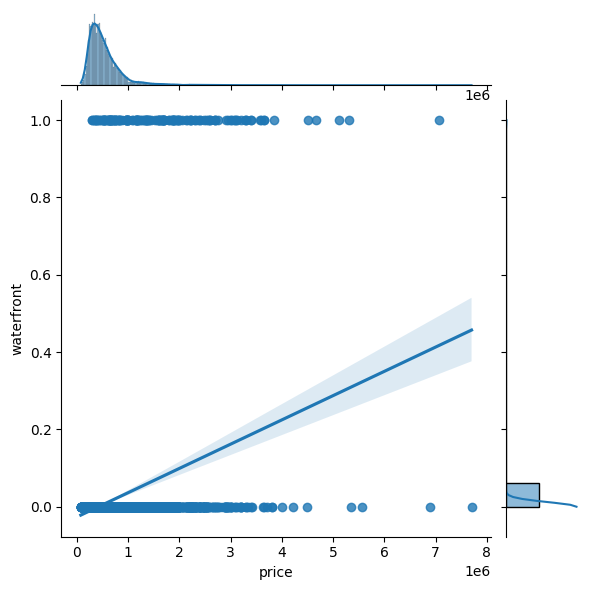

In [72]:
sns.jointplot(x=df['price'], y=df['waterfront'], kind='reg');

Изучая стоимость жилья в зависимости от вида на набережную, нельзя выделить какую-то бы ни было зависимость. Стоимость жилья распределена в своем диапазоне, который мы смотрели выше и наличие вида на набережную на нее никак не влияет. По количеству точек на графике можно лишь сказать, что домов без вида на набережную гораздо больше.

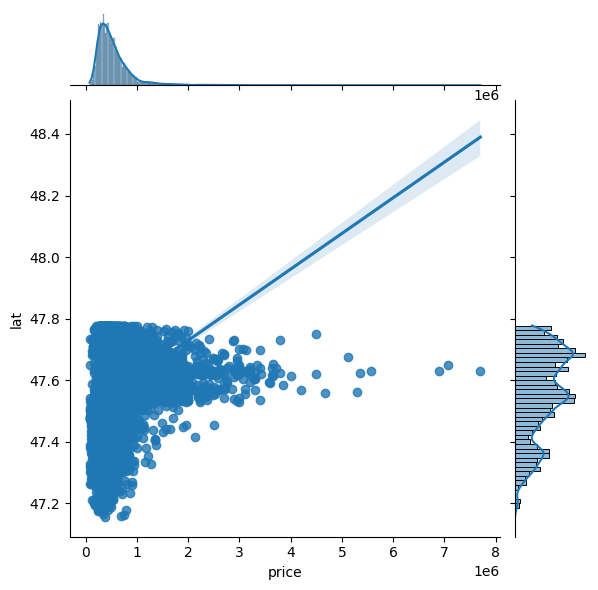

In [73]:
sns.jointplot(x=df['price'], y=df['lat'], kind='reg');

По графику зависимости цены жилья от географической широты можно сказать следующее: видим повышенное скопление точек на некоторых широтах, видимо, там находятся густонаселенные районы. Но цена от широты не зависит.

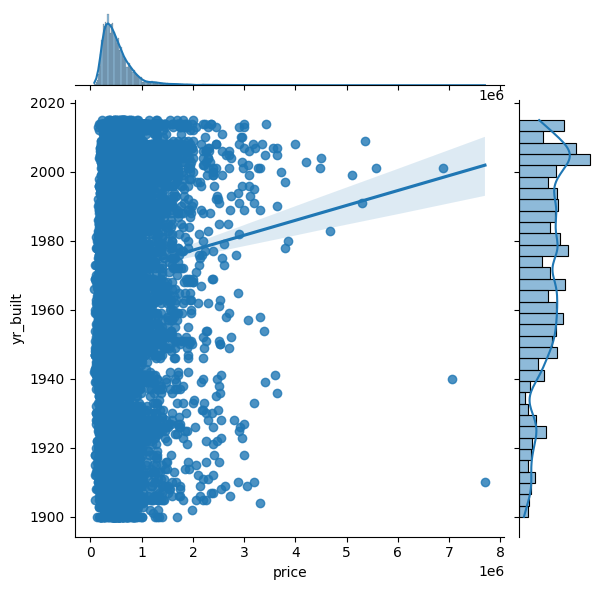

In [74]:
sns.jointplot(x=df['price'], y=df['yr_built'], kind='reg');

Зависимости цены от года постройки также не наблюдаем, нет такого, что новые дома стоят дороже. Судя по количеству точек новых домов просто больше по количеству.

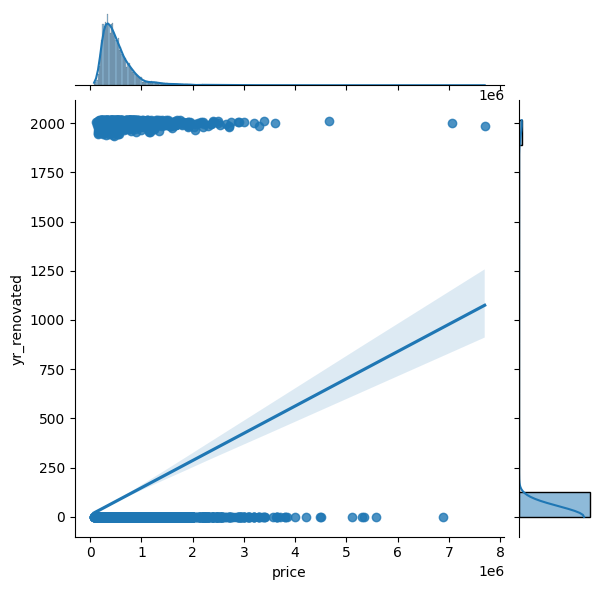

In [75]:
sns.jointplot(x=df['price'], y=df['yr_renovated'], kind='reg');

Нет зависимости цены от года реновации здания. Есть дома без реновации и их цена сосредоточена в определенном диапазоне, также как и у домов с реновацией, цены таких домов лежат в одинаковом диапазоне

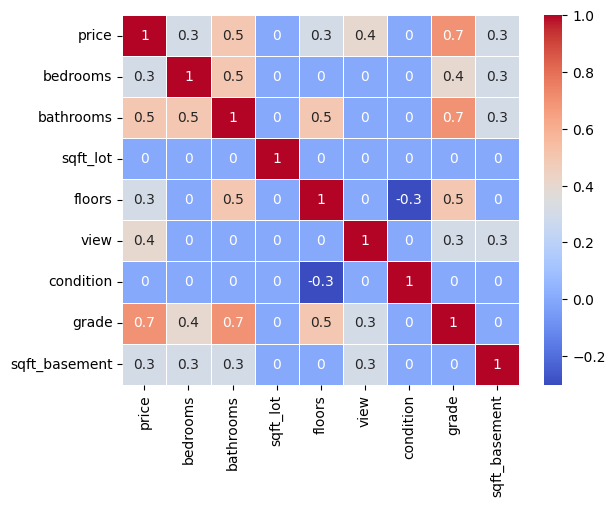

In [76]:
corr_matrix = df[['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'view', 'condition', 'grade', 'sqft_basement']].corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
corr_matrix
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm');

Из таблицы корреляции можем сделать следующий вывод: наибольшая зависимость цены проявляется от класса здания. Чуть ниже проявляет себя зависимость цены от количества ванных комнат и вида из дома. Есть совсем небольшая зависисмость стоимости жилья от количества спален, этажности дома, площади подвала. И цена совсем не зависит от состояния здания и общей площади.